In [5]:
import pandas
from tqdm import tqdm
import threading
import concurrent.futures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import pprint
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML

h2o.init()

2022-11-02 16:01:38.918518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-02 16:01:39.160399: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 16:01:39.160417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-02 16:01:39.189940: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-02 16:01:39.944522: W tensorflow/stream_executor/platform/de

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /home/osama/.local/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyz40e5y3
  JVM stdout: /tmp/tmpyz40e5y3/h2o_osama_started_from_python.out
  JVM stderr: /tmp/tmpyz40e5y3/h2o_osama_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_osama_kazv0n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.762 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [6]:
df = pandas.read_csv("~/Desktop/ML/rank_dataset.csv")
df = df.drop(columns='Unnamed: 0')
for column in df:
    if len(df[column].unique()) == 1:
        df.drop(columns=column, inplace=True)
x_cols = []
for column in df:
    if column in ["score", "index", "time", "mazeSearchOps", "rank", "markers",'id']:
        continue
    x_cols.append(column)
label_columns = ['score']

ids = df['id'].unique()
ids_train, ids_test = train_test_split(ids, test_size=0.2, random_state=42)
train = df[df['id'].isin(ids_train)]
test = df[df['id'].isin(ids_test)]

In [3]:
# Run AutoML for 20 base models

hf_train = h2o.H2OFrame(train)
hf_test = h2o.H2OFrame(test)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x_cols, y='score', training_frame=hf_train, validation_frame=hf_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:27:25.801: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████Job request failed Unexpected HTTP error: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')), will retry after 3s.
Job request failed Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Jobs/$03017f00000132d4ffffffff$_887c5c297616c4587e07a55c93f642e5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f239c914c40>: Failed to establish a new co

Job request failed Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Jobs/$03017f00000132d4ffffffff$_887c5c297616c4587e07a55c93f642e5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f22604784f0>: Failed to establish a new connection: [Errno 111] Connection refused')), will retry after 3s.
Job request failed Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Jobs/$03017f00000132d4ffffffff$_887c5c297616c4587e07a55c93f642e5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f239c914c40>: Failed to establish a new connection: [Errno 111] Connection refused')), will retry after 3s.
Job request failed Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Jobs/$03017f00000132d4ffffffff$_887c5c297616c4587e07a55c93f642e5 (Caused by NewConnectionError('<urllib3.connection.HT

H2OConnectionError: Unexpected HTTP error: HTTPConnectionPool(host='localhost', port=54321): Max retries exceeded with url: /3/Jobs/$03017f00000132d4ffffffff$_887c5c297616c4587e07a55c93f642e5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f239c914c70>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, activations, losses, Model, Input
from tensorflow.nn import leaky_relu
import numpy as np
from itertools import combinations
from tensorflow.keras.utils import plot_model, Progbar
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model architecture
class RankNet(Model):
    def __init__(self):
        super().__init__()
        self.dense = [layers.Dense(16, activation=leaky_relu), layers.Dense(8, activation=leaky_relu)]
        self.o = layers.Dense(1, activation='linear')
        self.oi_minus_oj = layers.Subtract()
    
    def call(self, inputs):
        xi, xj = inputs
        densei = self.dense[0](xi)
        densej = self.dense[0](xj)
        for dense in self.dense[1:]:
            densei = dense(densei)
            densej = dense(densej)
        oi = self.o(densei)
        oj= self.o(densej)
        oij = self.oi_minus_oj([oi, oj])
        output = layers.Activation('sigmoid')(oij)
        return output
    
    def build_graph(self):
        x = [Input(shape=(10)), Input(shape=(10))]
        return Model(inputs=x, outputs=self.call(x))

# visualize model architecture
plot_model(RankNet().build_graph(), show_shapes=False)

2022-11-06 17:51:58.026657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-06 17:51:58.263458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-06 17:51:58.263486: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-06 17:51:58.283255: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-06 17:51:58.981341: W tensorflow/stream_executor/platform/de

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2022-11-06 17:52:00.580652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-06 17:52:00.580679: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-06 17:52:00.580692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (osama-ROG-Zephyrus-G15-GA503QR-GA503QR): /proc/driver/nvidia/version does not exist
2022-11-06 17:52:00.580919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


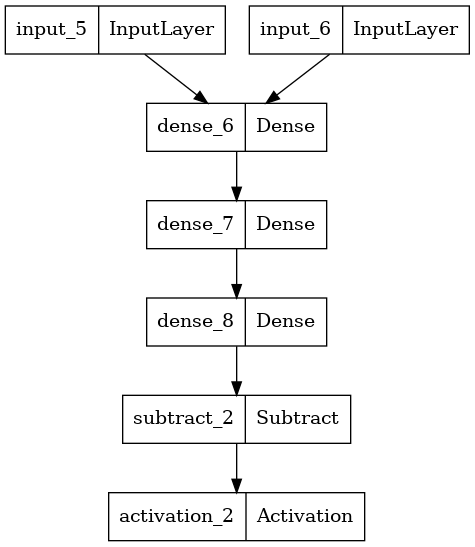

In [3]:
plot_model(RankNet().build_graph(), show_shapes=False)